In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize


In [3]:
data=pd.read_excel('Documents/USeful Data.xlsx', header=2)

In [21]:
#The following code was stolen from the Wikipedia entry on Catmull-Rom splines- this is the spline used by Excel to create
#smooth curves
import numpy
import pylab as plt

def CatmullRomSpline(P0, P1, P2, P3, nPoints=100):
    """
    P0, P1, P2, and P3 should be (x,y) point pairs that define the Catmull-Rom spline.
    nPoints is the number of points to include in this curve segment.
    """
    # Convert the points to numpy so that we can do array multiplication
    P0, P1, P2, P3 = map(numpy.array, [P0, P1, P2, P3])

    # Calculate t0 to t4
    alpha = 0.5
    def tj(ti, Pi, Pj):
        xi, yi = Pi
        xj, yj = Pj
        return (((xj-xi)**2 + (yj-yi)**2)**0.5)**alpha + ti

    t0 = 0
    t1 = tj(t0, P0, P1)
    t2 = tj(t1, P1, P2)
    t3 = tj(t2, P2, P3)

    # Only calculate points between P1 and P2
    t = numpy.linspace(t1, t2, nPoints)

    # Reshape so that we can multiply by the points P0 to P3
    # and get a point for each value of t.
    t = t.reshape(len(t), 1)
    #print(t)
    A1 = (t1-t)/(t1-t0)*P0 + (t-t0)/(t1-t0)*P1
    A2 = (t2-t)/(t2-t1)*P1 + (t-t1)/(t2-t1)*P2
    A3 = (t3-t)/(t3-t2)*P2 + (t-t2)/(t3-t2)*P3
    #print(A1)
    #print(A2)
    #print(A3)
    B1 = (t2-t)/(t2-t0)*A1 + (t-t0)/(t2-t0)*A2
    B2 = (t3-t)/(t3-t1)*A2 + (t-t1)/(t3-t1)*A3

    C = (t2-t)/(t2-t1)*B1 + (t-t1)/(t2-t1)*B2
    return C

def CatmullRomChain(P):
    """
    Calculate Catmull–Rom for a chain of points and return the combined curve.
    """
    sz = len(P)

    # The curve C will contain an array of (x, y) points.
    C = []
    for i in range(sz-3):
        c = CatmullRomSpline(P[i], P[i+1], P[i+2], P[i+3])
        C.extend(c)

    return C

## Nettleton

In [4]:
elev_a=np.array([115,302,754,358,586,274,82,94,245,256,73,5])
raw_a=np.array([27.28272082,8.7508466,-62.9465618,10.8768314,-29.3245162,14.6878542,34.29967,22.42889,-14.403425,-22.07664,
10.577755,20.012175])
elev_b=np.array([103,423,801,113,87,92,245,432,283,534,278,384,117])
raw_b=np.array([24.650805,-14.5840791,-73.2336817,54.0756479,62.6600121,62.7784036,29.8011835,-9.1709744,6.1009589,
-50.1557878,-13.0174326,-37.7075328,4.884895])

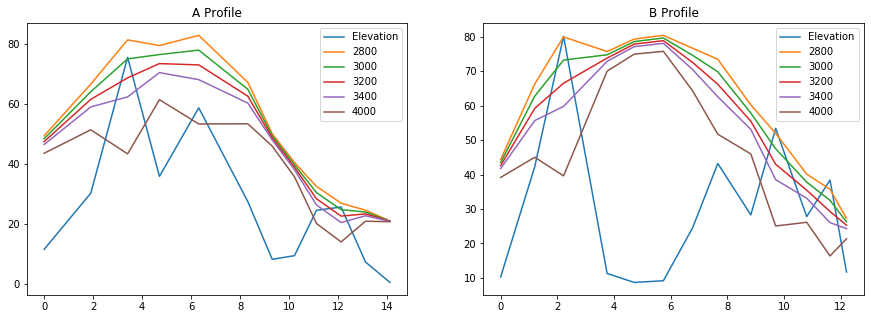

In [13]:
def Bouguer_a(p,label):
    g=raw_a+(.3086*elev_a)-(4.193*(10**-5)*p*elev_a)
    return plt.plot(data['HD_A'][:-1],g,label=label)
def Bouguer_b(p,label):
    g=raw_b+(.3086*elev_b)-(4.193*(10**-5)*p*elev_b)
    return plt.plot(data['HD_B'],g,label=label)
plt.figure(figsize=(15,5))
ax0=plt.subplot(121)
plt.plot(data['HD_A'][:-1],elev_a/10, label='Elevation')
Bouguer_a(p=2800,label='2800')
Bouguer_a(p=3000,label='3000')
Bouguer_a(p=3200,label='3200')
Bouguer_a(p=3400,label='3400')
Bouguer_a(p=4000,label='4000')
plt.title('A Profile')
ax0.legend()
ax1=plt.subplot(122)
line1=plt.plot(data['HD_B'],elev_b/10,label='Elevation')
line2=Bouguer_b(p=2800,label='2800')
line3=Bouguer_b(p=3000,label='3000')
line4=Bouguer_b(p=3200,label='3200')
line5=Bouguer_b(p=3400,label='3400')
line6=Bouguer_b(p=4000,label='4000')
plt.title('B Profile')
ax1.legend()

## Spherical model

In [24]:
def sphere_a(R,p,z,xc,yc,label):
    coords=np.array([data['E_A'],data['N_A']])
    x_a=np.hypot(xc-coords[0],yc-coords[1])
    x_a=np.array(x_a)*1000
    g_a=2.795*10**-5*(p*R**3/z**2)*(1/(1+(x_a/z)**2))**(3/2)
    x1,y1=zip(*CatmullRomChain(np.transpose(np.array([data['HD_A'],g_a]))))
    plt.plot(x1,y1,label=label)
    
def sphere_b(R,p,z,xc,yc,label):
    coords=np.array([data['E_B'],data['N_B']])
    x_b=np.hypot(xc-coords[0],yc-coords[1])
    x_b=np.array(x_b)*1000
    g_b=2.795*10**-5*(p*R**3/z**2)*(1/(1+(x_b/z)**2))**(3/2)
    x1,y1=zip(*CatmullRomChain(np.transpose(np.array([data['HD_B'],g_b]))))
    plt.plot(x1,y1,label=label)
    

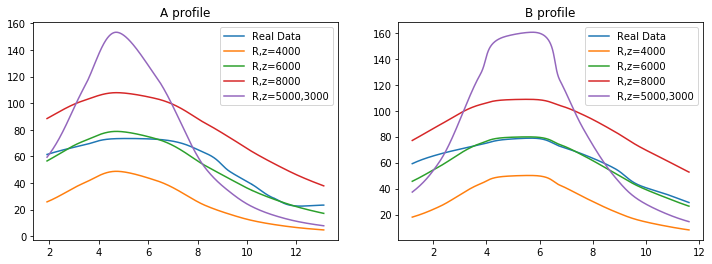

In [60]:
plt.figure(figsize=(12,4))
ax0=plt.subplot(121)
x0,y0=zip(*CatmullRomChain(np.transpose(np.array([data['HD_A'],data['g_A']]))))
plt.plot(x0,y0, label='Real Data')
sphere_a(R=4000,p=500,z=4000,xc=36,yc=96,label='R,z=4000')
sphere_a(R=6000,p=500,z=6000,xc=36,yc=96,label='R,z=6000')
sphere_a(R=8000,p=500,z=8000,xc=36,yc=96,label='R,z=8000')
sphere_a(R=5000,p=500,z=3000,xc=36,yc=96,label='R,z=5000,3000')
plt.title("A profile")
ax0.legend()
ax1=plt.subplot(122)
x0,y0=zip(*CatmullRomChain(np.transpose(np.array([data['HD_B'],data['g_B']]))))
plt.plot(x0,y0,label='Real Data')
sphere_b(R=4000,p=500,z=4000,xc=36,yc=96,label='R,z=4000')
sphere_b(R=6000,p=500,z=6000,xc=36,yc=96,label='R,z=6000')
sphere_b(R=8000,p=500,z=8000,xc=36,yc=96,label='R,z=8000')
sphere_b(R=5000,p=500,z=3000,xc=36,yc=96,label='R,z=5000,3000')
plt.title("B profile")
ax1.legend()

In [273]:
def RMSD_b(R,p,z,xc,yc):
    coords=np.array([data['E_B'],data['N_B']])
    x_b=np.hypot(xc-coords[0],yc-coords[1])
    x_b=np.array(x_b)*1000
    g_b=2.795*10**-5*(p*R**3/z**2)*(1/(1+(x_b/z)**2))**(3/2)
    return np.sqrt(((g_b-data['g_B'])**2).mean())

def RMSD_a(R,p,z,xc,yc):
    coords=np.array([data['E_A'],data['N_A']])
    x_a=np.hypot(xc-coords[0],yc-coords[1])
    x_a=np.array(x_a)*1000
    g_a=2.795*10**-5*(p*R**3/z**2)*(1/(1+(x_a/z)**2))**(3/2)
    return np.sqrt(((g_a-data['g_A'])**2).mean())

print(RMSD_a(R=4000,p=500,z=4000,xc=36,yc=96))
print(RMSD_a(R=6000,p=500,z=6000,xc=36,yc=96))
print(RMSD_a(R=8000,p=500,z=8000,xc=36,yc=96))
print(RMSD_a(R=10000,p=500,z=10000,xc=36,yc=96))

print(RMSD_b(R=4000,p=500,z=4000,xc=36,yc=96))
print(RMSD_b(R=6000,p=500,z=6000,xc=36,yc=96))
print(RMSD_b(R=8000,p=500,z=8000,xc=36,yc=96))
print(RMSD_b(R=10000,p=500,z=10000,xc=36,yc=96))

28.05215337114036
5.783130090047949
25.258808748628027
54.58510461587933
30.400890321690312
5.3788099000174325
26.8545363189677
57.05391958561995


## All Points

In [62]:
x_data=pd.DataFrame({'all_e':[41,40.1,39.2,37.7,37,36.1,35.2,34.4,33.4,32.8,31.7,31.1,30.6,37,37.1,37.2,37.2,37.3,37.4,37.3,37.5,
37.5,37.6,37.5,37.5,29.2,28.6,43.4,47.1,44.9,40.4,30.3],'all_n':[94.1,94.9,95.4,95.9,96.6,97.1,97.6,98,98.6,99.3,99.6,100.2,
100.5,91,92.9,94.4,95.7,97.3,99.3,100.3,101.2,102.1,103.1,104.1,105.1,104.2,89.3,106.4,88.7,84.8,80.2,81.6],'all_g':[
42.616477,59.1972729,66.4799423,73.7855599,77.8349001,78.8254116,72.5350635,66.1801936,55.4629509,42.9866282,35.4724394,
29.2712832,25.292503,47.34148082,61.4268946,68.5691342,73.3206234,72.8879478,62.4800302,48.602438,38.824746,28.330455,
22.575904,23.310707,20.884295,10.3,23.3,16.5,10.2,16.4,16.7,25.2,]})

x_data['all_x']=1000*np.hypot(xc-x_data['all_e'],yc-x_data['all_n'])

x_data=x_data.sort_values(by=['all_x'])

In [63]:
x_sphere=np.arange(0,17000,10)
g_sphere=2.795*10**-5*(p*R**3/z**2)*(1/(1+(x_sphere/z)**2))**(3/2)

In [65]:
import scipy.optimize
def bell(x,p,R,z):
    return 2.795*10**-5*(p*R**3/z**2)*(1/(1+(x/z)**2))**(3/2)
fit_params,pcov=scipy.optimize.curve_fit(f=bell, xdata=x_data['all_x'],ydata=x_data['all_g'],bounds=([400,5000,4000],
[600,15000,15000]))
fit_params

array([ 441.46119749, 7059.49021293, 7397.97009361])

Text(0.5, 1.0, 'g vs Distance from the center of the sphere')

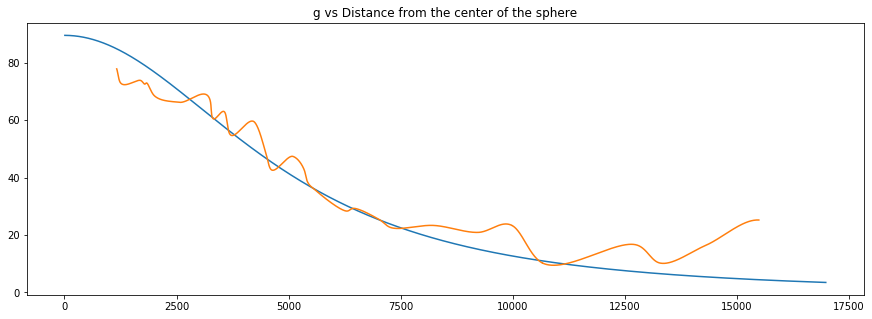

In [56]:
plt.figure(figsize=(15,5))
x0,y0=zip(*CatmullRomChain(np.transpose(np.array([x_sphere,g_sphere]))))
plt.plot(x0,y0)
x0,y0=zip(*CatmullRomChain(np.transpose(np.array([x_data['all_x'],x_data['all_g']]))))
plt.plot(x0,y0)
plt.title('g vs Distance from the center of the sphere')

In [23]:
fit_params

array([ 441.46119749, 7059.49021293, 7397.97009361])

In [196]:
#correlation
#free-air slope thing
#frequency filtering

In [263]:
f_air=np.array([31.7858,130.5378,247.1886,34.8718,26.8482,28.3912,75.607,133.3152,87.3338,164.7924,85.7908,118.5024,36.1062,35.489,
93.1972,232.6844,110.4788,180.8396,84.5564,25.3052,29.0084,75.607,79.0016,22.5278,1.543])+np.array([24.650805,-14.5840791,
-73.2336817,54.0756479,62.6600121,62.7784036,29.8011835,-9.1709744,6.1009589,-50.1557878,-13.0174326,-37.7075328,4.884895,
27.28272082,8.7508466,-62.9465618,10.8768314,-29.3245162,14.6878542,34.29967,22.42889,-14.403425,-22.07664,10.577755,
20.012175])
elev=[103,423,801,113,87,92,245,432,283,534,278,384,117,115,302,754,358,586,274,82,94,245,256,73,5]

In [264]:
np.polyfit(elev,f_air,1)[0]/(4.193*10**-5)

3933.899835618637

# Center

In [7]:
from shapely.geometry import LineString,Point
import geopandas as gpd

In [101]:
lines=gpd.GeoSeries([LineString([(41,94.1),(30.6,100.5)]),LineString([(37,91),(37.5,105.1)]),
                     LineString([(30,a_y0),(40,a_y1)]),LineString([(30,b_y0),(40,b_y1)])])

In [102]:
a=LineString([(41,94.1),(30.6,100.5)])
b=LineString([(37,91),(37.5,105.1)])
a1=LineString([(30,a_y0),(40,a_y1)])
b1=LineString([(30,b_y0),(40,b_y1)])

In [103]:
a1.intersection(b1).wkt

'POINT (35.28035237586759 95.76807261078484)'

In [99]:
#a
m=-1/((105.1-91)/(37.5-37))
b=95.7-(m*37.2)
a_y0=m*30+b
a_y1=m*40+b

In [100]:
# b
m=-1/((100.5-94.1)/(30.6-41))
b=97.1-(m*36.1)
b_y0=m*30+b
b_y1=m*40+b

In [ ]:
lines.plot()
plt.scatter(35.28035237586759,95.76807261078484)
plt.scatter(38,96)
#plt.plot([30,40],[a_y0,a_y1])

In [ ]:
38,96